## Libraries

In [213]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression
import pickle

## Import Data

In [2]:
df_segmentation = pd.read_csv('D:/Customer Analytics/segmentation data.csv',index_col=0)

## Data Exploration

In [3]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Correlation Estimate

In [5]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


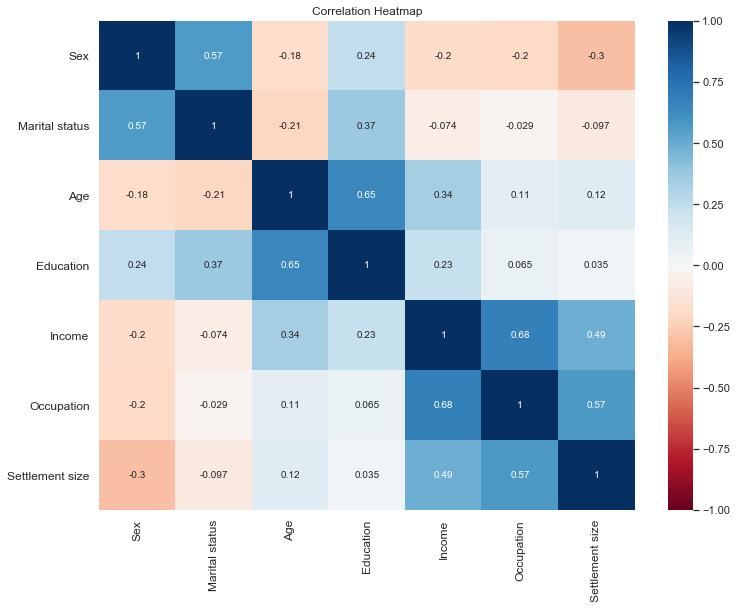

In [6]:
plt.figure(figsize=(12,9))
s = sns.heatmap(df_segmentation.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation=0,fontsize=12)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=12)
plt.title('Correlation Heatmap')
plt.show()

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of Raw Data')

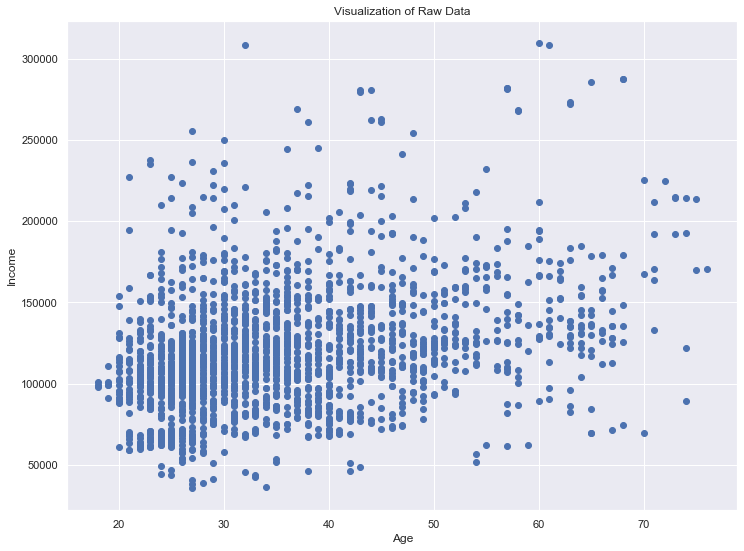

In [7]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of Raw Data')

## Standardization

In [8]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

## Hierarchical Clustering

In [9]:
hier_clust = linkage(segmentation_std, method='ward')

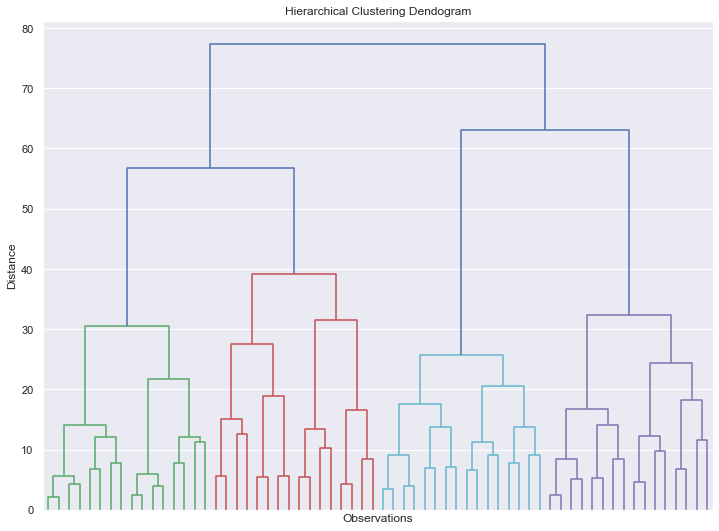

In [10]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode='level',
           p=5,
         show_leaf_counts=False,
         no_labels=True)
         #color_threshold=0)
plt.show()

## K-means Clustering

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

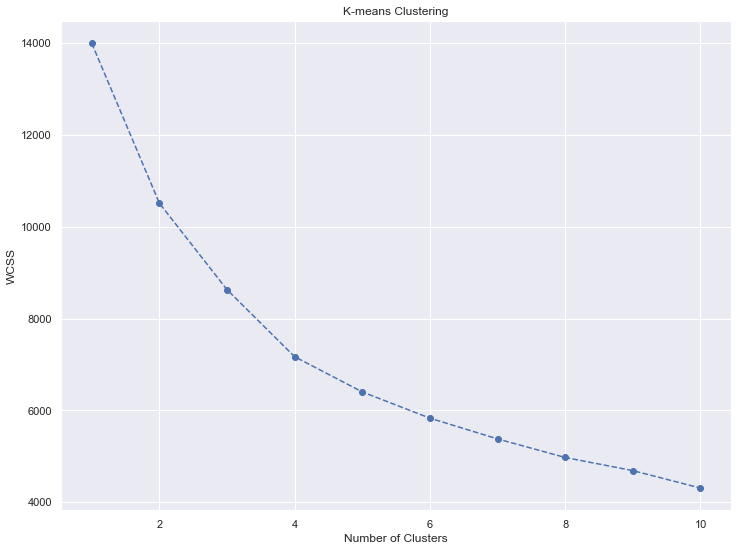

In [12]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [14]:
kmeans.fit(segmentation_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## Results

In [15]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [16]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695


In [17]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [18]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [19]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [20]:
df_segm_analysis.rename({0:'Well-Off',
                       1:'Fewer Opprtunities',
                       2:'Career Focused',
                       3:'Standard'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
Well-Off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
Fewer Opprtunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Career Focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525


In [21]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'Well-Off',
                                                                  1:'Fewer Opprtunities',
                                                                  3:'Standard',
                                                                  2:'Career Focused'})

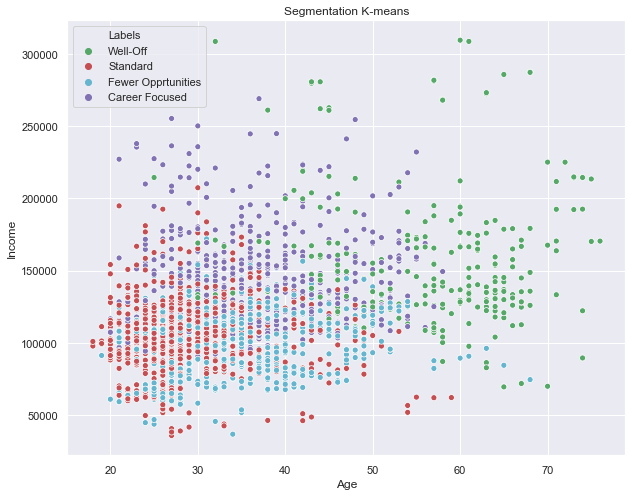

In [22]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette=['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

## PCA

In [23]:
pca = PCA()
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

Text(0, 0.5, 'Cummulative Explained Variance')

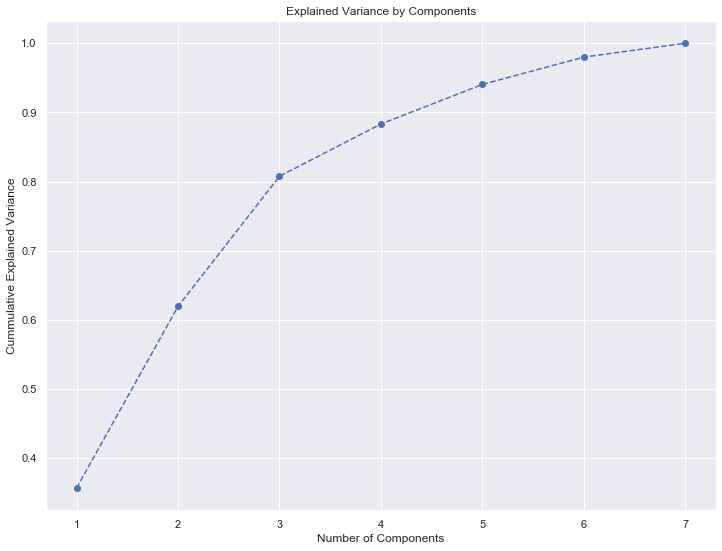

In [25]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Explained Variance')


In [26]:
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

## PCA Results

In [27]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [28]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                          columns=df_segmentation.columns.values,
                          index=['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x1963ae5e248>,
 <a list of 3 Text yticklabel objects>)

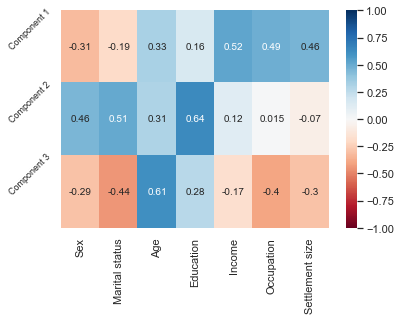

In [29]:
sns.heatmap(df_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2],
          ['Component 1','Component 2','Component 3'],
          rotation=45,
          fontsize=9)

In [30]:
 pca.transform(segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [31]:
scores_pca =  pca.transform(segmentation_std)

## K-means Clustering with PCA

In [32]:
wcss = []
for i in range(1, 11):
    kmeans_pca = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

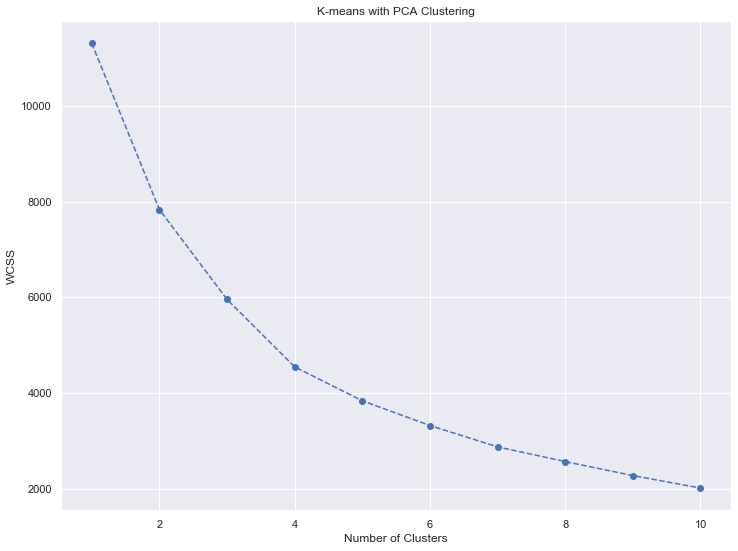

In [33]:
plt.figure(figsize=(12,9))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [34]:
kmeans_pca = KMeans(n_clusters=4,init='k-means++',random_state=42)

In [35]:
kmeans_pca.fit(scores_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

## K-means Clustering with PCA Results 

In [36]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [37]:
df_segm_pca_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,0
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,1
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,1
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,1
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [38]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953
1,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493
2,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [39]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'Well-Off',
                                                          1:'Fewer Opportunities',
                                                          2:'Standard',
                                                          3:'Career Focused'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
Well-Off,0.503788,0.689394,55.689394,2.128788,158209.094697,1.125000,1.106061,1.697646,2.029427,0.841953,264,0.1320
Fewer Opportunities,0.305011,0.095861,35.315904,0.760349,93633.372549,0.250545,0.039216,-1.047610,-0.904856,1.005493,459,0.2295
Standard,0.900576,0.963977,28.920749,1.061960,107571.126801,0.677233,0.439481,-1.106034,0.705300,-0.776925,694,0.3470
Career Focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [40]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map(
                                                         {0:'Well-Off',
                                                          1:'Fewer Opportunities',
                                                          2:'Standard',
                                                          3:'Career Focused'})

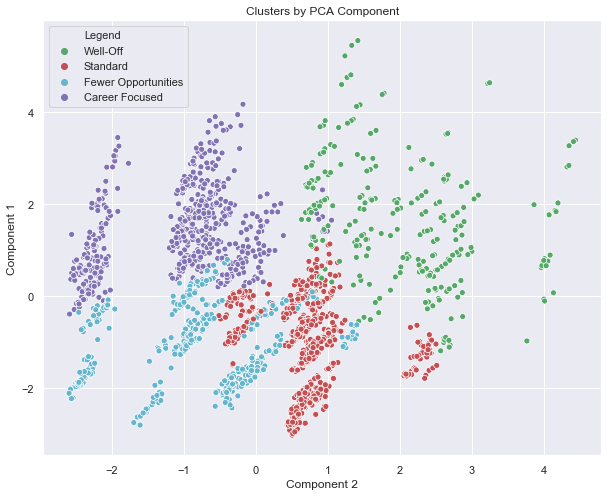

In [41]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Clusters by PCA Component')
plt.show()


## Data Export

In [42]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [43]:
pickle.dump(pca,open('pca.pickle','wb'))

In [44]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))

## Data Import

In [45]:
df_purchase = pd.read_csv('D:/Customer Analytics/purchase data.csv')

## Data Exploration

In [46]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [47]:
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

## Import Segmentation Model

In [48]:
scaler = pickle.load(open('scaler.pickle','rb'))

In [49]:
pca = pickle.load(open('pca.pickle','rb'))

In [50]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

## Standardization

In [51]:
features = df_purchase[['Sex','Marital status', 'Age', 'Education', 'Income', 'Occupation','Settlement size']]
df_purchase_segm_std = scaler.transform(features)

## PCA

In [52]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

## K-means PCA

In [53]:
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [54]:
df_purchase_predictors = df_purchase.copy()

In [55]:
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

## Data Analysis by Customer

In [56]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,1
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,1
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,1


In [57]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns={'Incidence':'N_Visits'})
temp1.head()

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [58]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns={'Incidence':'N_Purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [59]:
temp3['Average_N_Purchases'] = temp3['N_Purchases']/temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [60]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)

In [61]:
df_purchase_descr.head()

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,1
200000002,87,11,0.126437,0
200000003,97,10,0.103093,1
200000004,85,11,0.129412,1
200000005,111,13,0.117117,3


## Segment Proportions

In [62]:
segm_prop = df_purchase_descr[['N_Purchases','Segment']].groupby(['Segment']).count()/df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns={'N_Purchases':'Segment Proportions'})
segm_prop.head()


,Segment Proportions
Segment,
0,0.196
1,0.376
2,0.208
3,0.220


Text(0.5, 1.0, 'Segment Proportions')

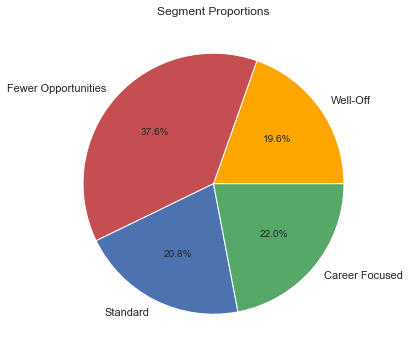

In [63]:
plt.figure(figsize=(9,6))
plt.pie(segm_prop['Segment Proportions'],
       labels=['Well-Off','Fewer Opportunities', 'Standard', 'Career Focused'],
       autopct='%1.1f%%',
       colors = ('orange','r','b','g'))
plt.title('Segment Proportions')

## Purchase Occasion and Purchase Incidence

In [64]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.295918,34.602041,0.284478
1,113.835106,22.792553,0.201755
2,117.471154,24.817308,0.212364
3,123.454545,39.827273,0.283102


In [65]:
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segement')

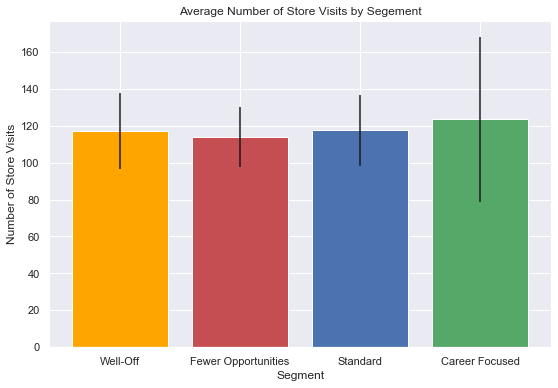

In [66]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Well-Off','Fewer Opportunities', 'Standard', 'Career Focused'),
       height=segments_mean['N_Visits'],
       yerr=segments_std['N_Visits'],
       color = ('orange','r','b','g'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segement')

Text(0.5, 1.0, 'Number of Purchases by Segment')

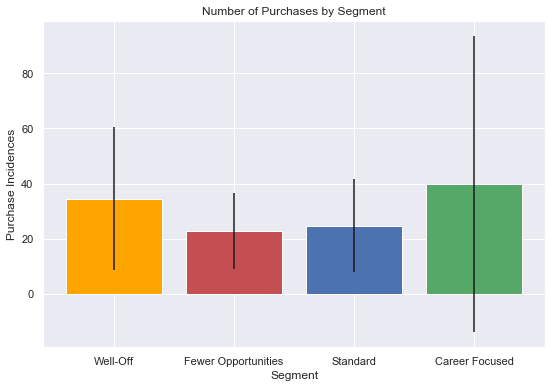

In [67]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Well-Off','Fewer Opportunities', 'Standard', 'Career Focused'),
       height=segments_mean['N_Purchases'],
       yerr=segments_std['N_Purchases'],
       color = ('orange','r','b','g'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

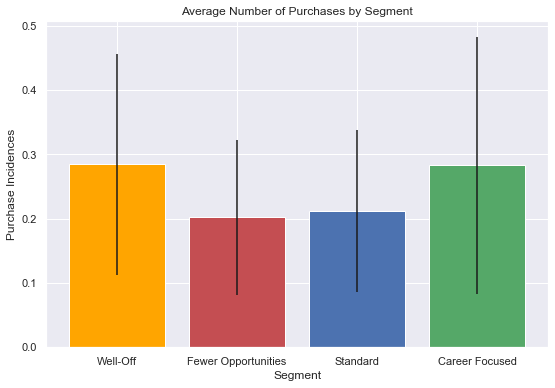

In [68]:
plt.figure(figsize=(9,6))
plt.bar(x=(0,1,2,3),
       tick_label=('Well-Off','Fewer Opportunities', 'Standard', 'Career Focused'),
       height=segments_mean['Average_N_Purchases'],
       yerr=segments_std['Average_N_Purchases'],
       color = ('orange','r','b','g'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

## Brand Choice

In [69]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence']==1]

In [70]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'],prefix='Brand',prefix_sep='-')
brand_dummies['Segment'],brand_dummies['ID'] = df_purchase_incidence['Segment'],df_purchase_incidence['ID']
brand_dummies

,Brand-1,Brand-2,Brand-3,Brand-4,Brand-5,Segment,ID
6,0,1,0,0,0,1,200000001
11,0,0,0,0,1,1,200000001
19,1,0,0,0,0,1,200000001
24,0,0,0,1,0,1,200000001
29,0,1,0,0,0,1,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,1,200000500
58648,1,0,0,0,0,1,200000500
58674,0,1,0,0,0,1,200000500
58687,0,1,0,0,0,1,200000500


In [71]:
temp = brand_dummies.groupby(['ID'],as_index=True).mean()    

In [72]:
mean_brand_choice = temp.groupby(['Segment'],as_index=True).mean()

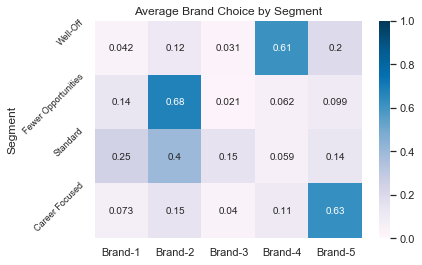

In [73]:
sns.heatmap(mean_brand_choice,
           vmin=0,
           vmax=1,
           cmap='PuBu',
           annot=True)
plt.yticks([0,1,2,3],['Well-Off','Fewer Opportunities', 'Standard', 'Career Focused'],rotation=45,fontsize=9)
plt.title('Average Brand Choice by Segment')
plt.show()

## Revenue

In [74]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==1]
temp.loc[:,'Revenue Brand 1'] = temp['Price_1']*temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment','Revenue Brand 1']] = temp[['Segment','Revenue Brand 1']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1
0,0,699.47
1,1,2258.90
2,2,2611.19
3,3,736.09


In [75]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==2]
temp.loc[:,'Revenue Brand 2'] = temp['Price_2']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 2']] = temp[['Segment','Revenue Brand 2']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1,Revenue Brand 2
0,0,699.47,1298.23
1,1,2258.90,13868.30
2,2,2611.19,4855.36
3,3,736.09,1746.42


In [76]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==3]
temp.loc[:,'Revenue Brand 3'] = temp['Price_3']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 3']] = temp[['Segment','Revenue Brand 3']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3
0,0,699.47,1298.23,731.35
1,1,2258.90,13868.30,716.25
2,2,2611.19,4855.36,3909.17
3,3,736.09,1746.42,664.75


In [77]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==4]
temp.loc[:,'Revenue Brand 4'] = temp['Price_4']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 4']] = temp[['Segment','Revenue Brand 4']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4
0,0,699.47,1298.23,731.35,14185.57
1,1,2258.90,13868.30,716.25,1629.31
2,2,2611.19,4855.36,3909.17,861.38
3,3,736.09,1746.42,664.75,2363.84


In [78]:
temp = df_purchase_predictors[df_purchase_predictors['Brand']==5]
temp.loc[:,'Revenue Brand 5'] = temp['Price_5']*temp['Quantity']
segments_brand_revenue[['Segment','Revenue Brand 5']] = temp[['Segment','Revenue Brand 5']].groupby(['Segment'],as_index=False).sum()
segments_brand_revenue

C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ANKIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5
0,0,699.47,1298.23,731.35,14185.57,5509.69
1,1,2258.90,13868.30,716.25,1629.31,2230.50
2,2,2611.19,4855.36,3909.17,861.38,2439.75
3,3,736.09,1746.42,664.75,2363.84,19441.06


In [79]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1']+
                                          segments_brand_revenue['Revenue Brand 2']+
                                          segments_brand_revenue['Revenue Brand 3']+
                                          segments_brand_revenue['Revenue Brand 4']+
                                          segments_brand_revenue['Revenue Brand 5']) 
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,699.47,1298.23,731.35,14185.57,5509.69,22424.31
1,1,2258.90,13868.30,716.25,1629.31,2230.50,20703.26
2,2,2611.19,4855.36,3909.17,861.38,2439.75,14676.85
3,3,736.09,1746.42,664.75,2363.84,19441.06,24952.16


In [80]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment Proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0:'Well-Off',
                                                                           1:'Fewer Opportunities',
                                                                           2:'Standard',
                                                                           3:'Career Focused'})
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196
Fewer Opportunities,2258.90,13868.30,716.25,1629.31,2230.50,20703.26,0.376
Standard,2611.19,4855.36,3909.17,861.38,2439.75,14676.85,0.208
Career Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220


## Data Preparation

In [81]:
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca,prefix='Segment',prefix_sep='_')
df_purchae_predictors = pd.concat([df_purchase_predictors,segment_dummies],axis=1)

In [82]:
df_pa = df_purchase_predictors

## Purchase Probability Model

In [83]:
Y = df_pa['Incidence']

In [84]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1']+
            df_pa['Price_2']+
            df_pa['Price_3']+
            df_pa['Price_4']+
            df_pa['Price_5'])/5

In [85]:
model_purchase = LogisticRegression(solver='sag')
model_purchase.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
model_purchase.coef_

array([[-2.34856257]])

## Price Elasticity of Purchase Probability

In [87]:
df_pa[['Price_1','Price_2','Price_3','Price_4','Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [88]:
price_range = np.arange(0.5,3.5,0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [89]:
df_price_range = pd.DataFrame(price_range)

In [90]:
Y_pr = model_purchase.predict_proba(df_price_range)

In [91]:
Y_pr

array([[0.08209558, 0.91790442],
       [0.08388282, 0.91611718],
       [0.08570533, 0.91429467],
       [0.08756366, 0.91243634],
       [0.08945834, 0.91054166],
       [0.09138991, 0.90861009],
       [0.09335891, 0.90664109],
       [0.09536588, 0.90463412],
       [0.09741136, 0.90258864],
       [0.09949588, 0.90050412],
       [0.10161999, 0.89838001],
       [0.10378423, 0.89621577],
       [0.10598911, 0.89401089],
       [0.10823518, 0.89176482],
       [0.11052297, 0.88947703],
       [0.11285299, 0.88714701],
       [0.11522577, 0.88477423],
       [0.11764182, 0.88235818],
       [0.12010166, 0.87989834],
       [0.12260578, 0.87739422],
       [0.12515469, 0.87484531],
       [0.12774887, 0.87225113],
       [0.13038881, 0.86961119],
       [0.13307499, 0.86692501],
       [0.13580785, 0.86419215],
       [0.13858787, 0.86141213],
       [0.14141549, 0.85858451],
       [0.14429113, 0.85570887],
       [0.14721522, 0.85278478],
       [0.15018817, 0.84981183],
       [0.

In [92]:
purchase_pr = Y_pr[:][:,1]

In [93]:
pe = model_purchase.coef_[:,0]*price_range*(1-purchase_pr)

In [94]:
df_price_elasticities = pd.DataFrame(price_range)

In [95]:
df_price_elasticities = df_price_elasticities.rename(columns={0:"Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096403
1,0.51,-0.100472
2,0.52,-0.104668
3,0.53,-0.108994
4,0.54,-0.113453
...,...,...
295,3.45,-8.014747
296,3.46,-8.040001
297,3.47,-8.065219
298,3.48,-8.090405


In [96]:
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096403
1,0.51,-0.100472
2,0.52,-0.104668
3,0.53,-0.108994
4,0.54,-0.113453
5,0.55,-0.118049
6,0.56,-0.122785
7,0.57,-0.127664
8,0.58,-0.132690
9,0.59,-0.137867


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

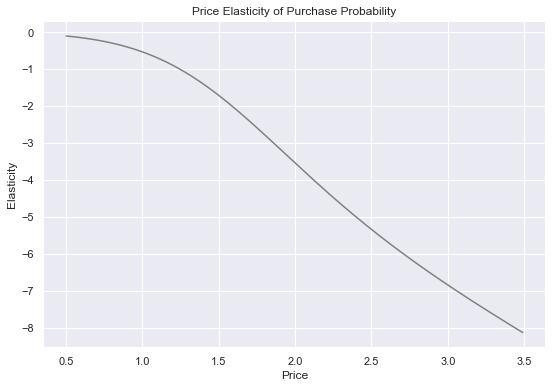

In [97]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchased Probaility by Segments

## Segment 1 - Fewer Opportunities

In [98]:
df_pa_segment_1 = df_pa[df_pa['Segment']==1]

In [99]:
Y = df_pa_segment_1['Incidence']

In [100]:
X = pd.DataFrame()

In [101]:
X['Mean_Price'] = (df_pa_segment_1['Price_1']+
            df_pa_segment_1['Price_2']+
            df_pa_segment_1['Price_3']+
            df_pa_segment_1['Price_4']+
            df_pa_segment_1['Price_5'])/5

In [102]:
model_incidence_segment_1 = LogisticRegression(solver='sag')
model_incidence_segment_1.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
model_incidence_segment_1.coef_

array([[-3.63702994]])

In [104]:
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:,1]
pe_segment_1= model_incidence_segment_1.coef_[:,0]*price_range*(1-purchase_pr_segment_1)

## Results

In [105]:
df_price_elasticities['PE_Segement_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1
0,0.50,-0.096403,-0.031004
1,0.51,-0.100472,-0.032775
2,0.52,-0.104668,-0.034633
3,0.53,-0.108994,-0.036581
4,0.54,-0.113453,-0.038625
5,0.55,-0.118049,-0.040768
6,0.56,-0.122785,-0.043014
7,0.57,-0.127664,-0.045368
8,0.58,-0.132690,-0.047835
9,0.59,-0.137867,-0.050420


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

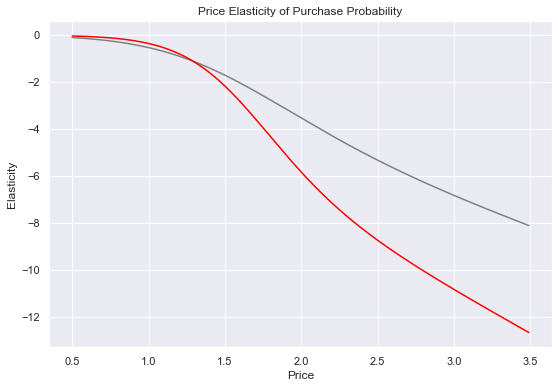

In [159]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_1,color='red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Segment 2 - Standard

In [160]:
df_pa_segment_2 = df_pa[df_pa['Segment']==2]
Y = df_pa_segment_2['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_2['Price_1']+
            df_pa_segment_2['Price_2']+
            df_pa_segment_2['Price_3']+
            df_pa_segment_2['Price_4']+
            df_pa_segment_2['Price_5'])/5
model_incidence_segment_2 = LogisticRegression(solver='sag')
model_incidence_segment_2.fit(X,Y)
model_incidence_segment_2.coef_
Y_segment_2 = model_incidence_segment_2.predict_proba(df_price_range)
purchase_pr_segment_2 = Y_segment_2[:][:,1]
pe_segment_2= model_incidence_segment_2.coef_[:,0]*price_range*(1-purchase_pr_segment_2)

## Results

In [161]:
df_price_elasticities['PE_Segement_2'] = pe_segment_2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014747,-12.531934,-5.110859,-5.898622,-4.291376,-4.863304,-4.984816,-3.231574,0.162232
296,3.46,-8.040001,-12.568824,-5.127881,-5.915986,-4.304009,-4.881508,-5.001725,-3.247768,0.160332
297,3.47,-8.065219,-12.605698,-5.144883,-5.933342,-4.316636,-4.899682,-5.018615,-3.263930,0.158446
298,3.48,-8.090405,-12.642555,-5.161867,-5.950690,-4.329257,-4.917826,-5.035484,-3.280059,0.156575


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

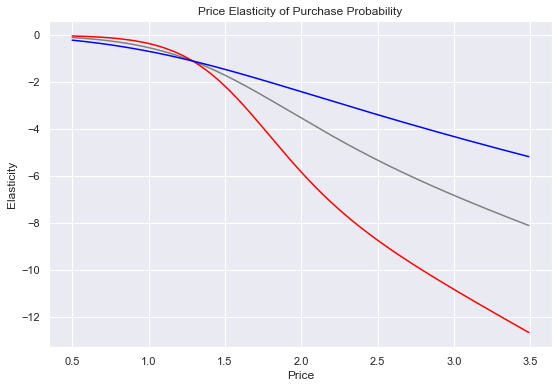

In [162]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_1,color='red')
plt.plot(price_range,pe_segment_2,color='blue')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Segment 3 - Career Focused

In [110]:
df_pa_segment_3 = df_pa[df_pa['Segment']==3]
Y = df_pa_segment_3['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_3['Price_1']+
            df_pa_segment_3['Price_2']+
            df_pa_segment_3['Price_3']+
            df_pa_segment_3['Price_4']+
            df_pa_segment_3['Price_5'])/5
model_incidence_segment_3 = LogisticRegression(solver='sag')
model_incidence_segment_3.fit(X,Y)
model_incidence_segment_3.coef_
Y_segment_3 = model_incidence_segment_3.predict_proba(df_price_range)
purchase_pr_segment_3 = Y_segment_1[:][:,1]
pe_segment_3= model_incidence_segment_3.coef_[:,0]*price_range*(1-purchase_pr_segment_3)

## Results

In [111]:
df_price_elasticities['PE_Segement_3'] = pe_segment_3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3
0,0.50,-0.096403,-0.031004,-0.209219,-0.014593
1,0.51,-0.100472,-0.032775,-0.215774,-0.015427
2,0.52,-0.104668,-0.034633,-0.222439,-0.016301
3,0.53,-0.108994,-0.036581,-0.229213,-0.017218
4,0.54,-0.113453,-0.038625,-0.236099,-0.018180
5,0.55,-0.118049,-0.040768,-0.243097,-0.019189
6,0.56,-0.122785,-0.043014,-0.250208,-0.020246
7,0.57,-0.127664,-0.045368,-0.257432,-0.021354
8,0.58,-0.132690,-0.047835,-0.264770,-0.022515
9,0.59,-0.137867,-0.050420,-0.272223,-0.023732


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

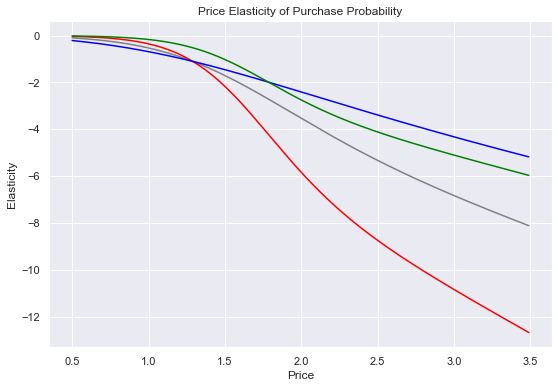

In [163]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_1,color='red')
plt.plot(price_range,pe_segment_2,color='blue')
plt.plot(price_range,pe_segment_3,color='green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Segment 0 - Well Off

In [113]:
df_pa_segment_0 = df_pa[df_pa['Segment']==0]
Y = df_pa_segment_0['Incidence']
X = pd.DataFrame()
X['Mean_Price'] = (df_pa_segment_0['Price_1']+
            df_pa_segment_0['Price_2']+
            df_pa_segment_0['Price_3']+
            df_pa_segment_0['Price_4']+
            df_pa_segment_0['Price_5'])/5
model_incidence_segment_0 = LogisticRegression(solver='sag')
model_incidence_segment_0.fit(X,Y)
model_incidence_segment_0.coef_
Y_segment_0 = model_incidence_segment_0.predict_proba(df_price_range)
purchase_pr_segment_0 = Y_segment_1[:][:,1]
pe_segment_0= model_incidence_segment_0.coef_[:,0]*price_range*(1-purchase_pr_segment_0)

## Results

In [114]:
df_price_elasticities['PE_Segement_0'] = pe_segment_0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0
0,0.50,-0.096403,-0.031004,-0.209219,-0.014593,-0.010617
1,0.51,-0.100472,-0.032775,-0.215774,-0.015427,-0.011223
2,0.52,-0.104668,-0.034633,-0.222439,-0.016301,-0.011859
3,0.53,-0.108994,-0.036581,-0.229213,-0.017218,-0.012527
4,0.54,-0.113453,-0.038625,-0.236099,-0.018180,-0.013227
5,0.55,-0.118049,-0.040768,-0.243097,-0.019189,-0.013960
6,0.56,-0.122785,-0.043014,-0.250208,-0.020246,-0.014729
7,0.57,-0.127664,-0.045368,-0.257432,-0.021354,-0.015536
8,0.58,-0.132690,-0.047835,-0.264770,-0.022515,-0.016380
9,0.59,-0.137867,-0.050420,-0.272223,-0.023732,-0.017266


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

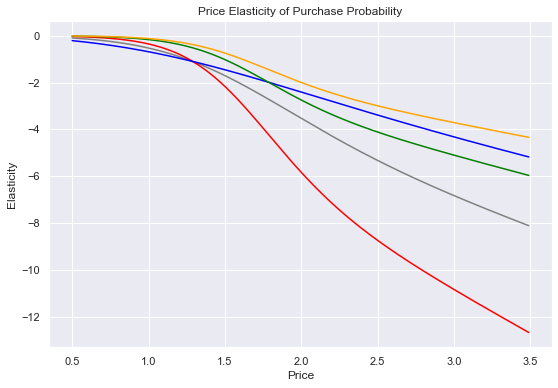

In [164]:
plt.figure(figsize=(9,6))
plt.plot(price_range,pe,color='grey')
plt.plot(price_range,pe_segment_1,color='red')
plt.plot(price_range,pe_segment_2,color='blue')
plt.plot(price_range,pe_segment_3,color='green')
plt.plot(price_range,pe_segment_0,color='orange')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

## Purchase Probability with Promotion Feature

## Data Preparation

In [116]:
Y = df_pa['Incidence']

In [117]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1']+
            df_pa['Price_2']+
            df_pa['Price_3']+
            df_pa['Price_4']+
            df_pa['Price_5'])/5

In [118]:
X['Mean_Promotion'] = (df_pa['Promotion_1']+
            df_pa['Promotion_2']+
            df_pa['Promotion_3']+
            df_pa['Promotion_4']+
            df_pa['Promotion_5'])/5

## Model Estimation

In [119]:
model_incidence_promotion = LogisticRegression(solver='sag')
model_incidence_promotion.fit(X,Y)
model_incidence_promotion.coef_

array([[-1.49443984,  0.56151573]])

## Price Elasticity with Promotion

In [120]:
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns={0:"Price_Range"})

In [121]:
df_price_elasticity_promotion['Promotion'] = 1

In [122]:
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [123]:
promo = Y_promotion[:,1]
price_elasticity_promo = (model_incidence_promotion.coef_[:,0]*price_range)*(1-promo)

In [124]:
df_price_elasticities['Elasticity_Promotion'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion
0,0.50,-0.096403,-0.031004,-0.209219,-0.014593,-0.010617,-0.125766
1,0.51,-0.100472,-0.032775,-0.215774,-0.015427,-0.011223,-0.129884
2,0.52,-0.104668,-0.034633,-0.222439,-0.016301,-0.011859,-0.134081
3,0.53,-0.108994,-0.036581,-0.229213,-0.017218,-0.012527,-0.138357
4,0.54,-0.113453,-0.038625,-0.236099,-0.018180,-0.013227,-0.142715
5,0.55,-0.118049,-0.040768,-0.243097,-0.019189,-0.013960,-0.147155
6,0.56,-0.122785,-0.043014,-0.250208,-0.020246,-0.014729,-0.151677
7,0.57,-0.127664,-0.045368,-0.257432,-0.021354,-0.015536,-0.156284
8,0.58,-0.132690,-0.047835,-0.264770,-0.022515,-0.016380,-0.160975
9,0.59,-0.137867,-0.050420,-0.272223,-0.023732,-0.017266,-0.165753


## Price Elasticity without Promotion

In [125]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [126]:
df_price_elasticity_promotion_no['Promotion'] = 0

In [127]:
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [128]:
no_promo = Y_no_promo[: , 1]

In [129]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [165]:
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773
...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014747,-12.531934,-5.110859,-5.898622,-4.291376,-4.863304,-4.984816,-3.231574,0.162232
296,3.46,-8.040001,-12.568824,-5.127881,-5.915986,-4.304009,-4.881508,-5.001725,-3.247768,0.160332
297,3.47,-8.065219,-12.605698,-5.144883,-5.933342,-4.316636,-4.899682,-5.018615,-3.263930,0.158446
298,3.48,-8.090405,-12.642555,-5.161867,-5.950690,-4.329257,-4.917826,-5.035484,-3.280059,0.156575


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability with and without Promotion')

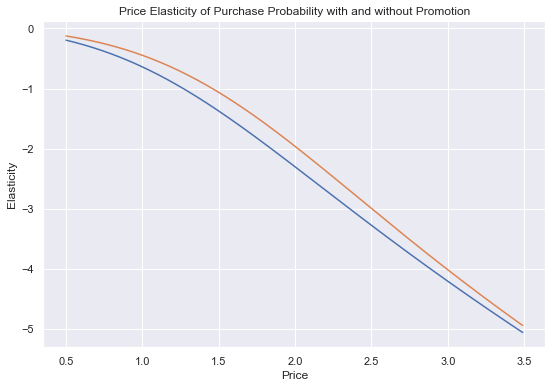

In [131]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')

## Brand Choice

## Data Preparation

In [132]:
brand_choice = df_pa[df_pa['Incidence']==1]

In [133]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,0,0,0,0,42,1,120946,1,0,1
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,0,0,0,0,42,1,120946,1,0,1
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,0,0,0,0,42,1,120946,1,0,1
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,0,0,0,0,42,1,120946,1,0,1


In [134]:
Y = brand_choice['Brand']

In [135]:
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment'],
      dtype=object)

In [136]:
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [137]:
model_brand_choice = LogisticRegression(solver='sag',multi_class='multinomial')
model_brand_choice.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [138]:
model_brand_choice.coef_

array([[-3.91597454,  0.65845257,  2.41765049,  0.70407072, -0.20213333],
       [ 1.2746064 , -1.87985902, -0.21266296, -0.20634563,  0.58786474],
       [ 1.6242238 ,  0.5621285 ,  0.5010098 ,  1.03953604,  0.45283058],
       [ 0.57453043,  0.39558335, -1.400629  , -1.24624899,  0.2493432 ],
       [ 0.44261391,  0.2636946 , -1.30536833, -0.29101214, -1.08790519]])

In [139]:
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef    

,0,1,2,3,4
0,-3.915975,0.658453,2.417650,0.704071,-0.202133
1,1.274606,-1.879859,-0.212663,-0.206346,0.587865
2,1.624224,0.562129,0.501010,1.039536,0.452831
3,0.574530,0.395583,-1.400629,-1.246249,0.249343
4,0.442614,0.263695,-1.305368,-0.291012,-1.087905


In [140]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1','Coef_Brand_2','Coef_Brand_3','Coef_Brand_4','Coef_Brand_5',]
bc_coef.columns = [coefficients]
prices = ['Price_1','Price_2','Price_3','Price_4','Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


## Own Price Elasticity Brand 5

In [141]:
df_own_brand_5 = pd.DataFrame(index=np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
...,...,...,...,...,...
295,1.384559,1.764717,2.006694,2.159658,3.45
296,1.384559,1.764717,2.006694,2.159658,3.46
297,1.384559,1.764717,2.006694,2.159658,3.47
298,1.384559,1.764717,2.006694,2.159658,3.48


In [142]:
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [143]:
pr_own_brand_5 = predict_brand_5[: ][:,4]

In [144]:
beta5 = bc_coef.iloc[4,4]
beta5

-1.09

In [145]:
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [146]:
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096403,-0.031004,-0.209219,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056
1,0.51,-0.100472,-0.032775,-0.215774,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617
2,0.52,-0.104668,-0.034633,-0.222439,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207
3,0.53,-0.108994,-0.036581,-0.229213,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827
4,0.54,-0.113453,-0.038625,-0.236099,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478
5,0.55,-0.118049,-0.040768,-0.243097,-0.019189,-0.013960,-0.147155,-0.227348,-0.057159
6,0.56,-0.122785,-0.043014,-0.250208,-0.020246,-0.014729,-0.151677,-0.233992,-0.058871
7,0.57,-0.127664,-0.045368,-0.257432,-0.021354,-0.015536,-0.156284,-0.240743,-0.060615
8,0.58,-0.132690,-0.047835,-0.264770,-0.022515,-0.016380,-0.160975,-0.247602,-0.062391
9,0.59,-0.137867,-0.050420,-0.272223,-0.023732,-0.017266,-0.165753,-0.254568,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

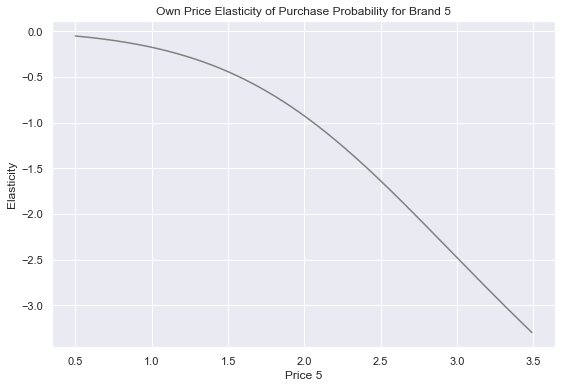

In [147]:
plt.figure(figsize=(9,6))
plt.plot(price_range,own_price_elasticity_brand_5,color='grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

## Cross Price Elasticity Brand 5,Cross Brand 4

In [148]:
df_brand_5_cross_brand4 = pd.DataFrame(index=np.arange(price_range.size))
df_brand_5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand_5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand_5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand_5_cross_brand4['Price_4'] = price_range
df_brand_5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [149]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand_5_cross_brand4)

In [150]:
pr_brand_4 = predict_brand5_cross_brand4[:][:,3]

In [151]:
beta5

-1.09

In [152]:
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [153]:
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096403,-0.031004,-0.209219,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011
1,0.51,-0.100472,-0.032775,-0.215774,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288
2,0.52,-0.104668,-0.034633,-0.222439,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507
3,0.53,-0.108994,-0.036581,-0.229213,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669
4,0.54,-0.113453,-0.038625,-0.236099,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773
5,0.55,-0.118049,-0.040768,-0.243097,-0.019189,-0.013960,-0.147155,-0.227348,-0.057159,0.357820
6,0.56,-0.122785,-0.043014,-0.250208,-0.020246,-0.014729,-0.151677,-0.233992,-0.058871,0.362809
7,0.57,-0.127664,-0.045368,-0.257432,-0.021354,-0.015536,-0.156284,-0.240743,-0.060615,0.367741
8,0.58,-0.132690,-0.047835,-0.264770,-0.022515,-0.016380,-0.160975,-0.247602,-0.062391,0.372614
9,0.59,-0.137867,-0.050420,-0.272223,-0.023732,-0.017266,-0.165753,-0.254568,-0.064200,0.377430


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt to Brand 4')

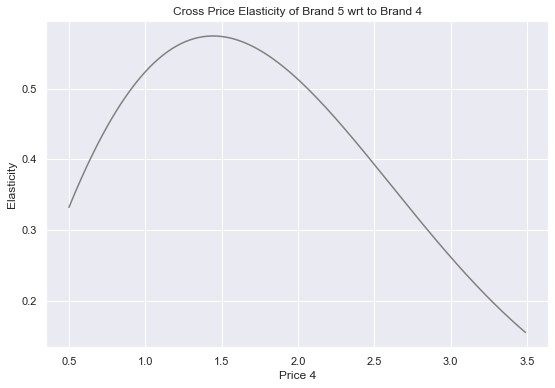

In [154]:
plt.figure(figsize=(9,6))
plt.plot(price_range,brand5_cross_brand4_price_elasticity,color='grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt to Brand 4')

## Own and Cross-Price Elasticity by Segment

## Well-Off

In [167]:
brand_choice_s0 = df_pa[df_pa['Incidence']==1]
brand_choice_s0 = brand_choice_s3[brand_choice_s0['Segment']==0]
pd.options.display.max_rows = 100
brand_choice_s0

C:\Users\ANKIT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,0,0,1,1,52,2,159052,2,1,0
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,1,0,1,1,52,2,159052,2,1,0
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,0,0,1,1,52,2,159052,2,1,0
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,1,0,1,1,52,2,159052,2,1,0
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,1,0,1,1,52,2,159052,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,0,0,1,1,44,2,193816,2,1,0
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,0,0,1,1,44,2,193816,2,1,0
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,0,0,1,1,44,2,193816,2,1,0
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,0,0,1,1,44,2,193816,2,1,0


In [168]:
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s0.fit(X, Y)

# coefficients table for segment 0
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.82,0.12,-0.11
Price_2,-0.96,-1.38,1.29,0.78,0.27
Price_3,2.01,-1.65,-0.49,0.03,0.11
Price_4,2.52,0.96,-0.25,-1.90,-1.33
Price_5,-0.99,-0.30,1.17,0.56,-0.44


## Own Brand Price Elasticity

In [171]:
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities['Brand 5 S0'] = own_price_elasticity_brand_5_s0

## Cross-Brand Price Elasticity

In [173]:
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities['Brand_5_Cross_Brand_4_S0'] = brand5_cross_brand4_price_elasticity_s0
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011,-0.297332,0.482421
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288,-0.303378,0.491726
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507,-0.309435,0.501016
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669,-0.315502,0.510290
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773,-0.321580,0.519548
5,0.55,-0.118049,-0.040768,-0.243965,-0.019189,-0.013960,-0.147155,-0.227348,-0.057159,0.357820,-0.327670,0.528790
6,0.56,-0.122785,-0.043014,-0.251095,-0.020246,-0.014729,-0.151677,-0.233992,-0.058871,0.362809,-0.333772,0.538017
7,0.57,-0.127664,-0.045368,-0.258339,-0.021354,-0.015536,-0.156284,-0.240743,-0.060615,0.367741,-0.339885,0.547227
8,0.58,-0.132690,-0.047835,-0.265696,-0.022515,-0.016380,-0.160975,-0.247602,-0.062391,0.372614,-0.346012,0.556420
9,0.59,-0.137867,-0.050420,-0.273169,-0.023732,-0.017266,-0.165753,-0.254568,-0.064200,0.377430,-0.352151,0.565598


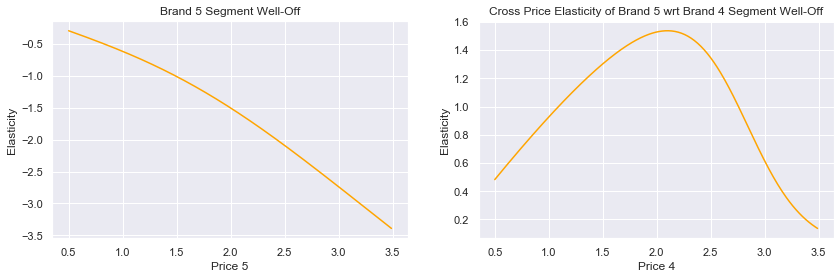

In [175]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s0, color = 'orange')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, color = 'orange')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

## Fewer-Opportunities

In [176]:
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [177]:
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own Brand Price Elasticity

In [179]:
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

## Cross-Brand Price Elasticity

In [180]:
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

## Standard

In [181]:
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [182]:
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own Brand Price Elasticity

In [183]:
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

## Cross-Brand Price Elasticity

In [184]:
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011,-0.297332,0.482421,-0.001034,0.187010,-0.116286,0.160463
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288,-0.303378,0.491726,-0.001096,0.189373,-0.119334,0.162413
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507,-0.309435,0.501016,-0.001160,0.191685,-0.122417,0.164317
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669,-0.315502,0.510290,-0.001229,0.193947,-0.125536,0.166177
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773,-0.321580,0.519548,-0.001300,0.196158,-0.128690,0.167992
5,0.55,-0.118049,-0.040768,-0.243965,-0.019189,-0.013960,-0.147155,-0.227348,-0.057159,0.357820,-0.327670,0.528790,-0.001375,0.198319,-0.131880,0.169763
6,0.56,-0.122785,-0.043014,-0.251095,-0.020246,-0.014729,-0.151677,-0.233992,-0.058871,0.362809,-0.333772,0.538017,-0.001455,0.200430,-0.135108,0.171490
7,0.57,-0.127664,-0.045368,-0.258339,-0.021354,-0.015536,-0.156284,-0.240743,-0.060615,0.367741,-0.339885,0.547227,-0.001538,0.202492,-0.138372,0.173173
8,0.58,-0.132690,-0.047835,-0.265696,-0.022515,-0.016380,-0.160975,-0.247602,-0.062391,0.372614,-0.346012,0.556420,-0.001626,0.204505,-0.141674,0.174813
9,0.59,-0.137867,-0.050420,-0.273169,-0.023732,-0.017266,-0.165753,-0.254568,-0.064200,0.377430,-0.352151,0.565598,-0.001718,0.206468,-0.145013,0.176410


## Career Focused

In [185]:
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

In [186]:
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

## Own Brand Price Elasticity

In [187]:
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

## Cross-Brand Price Elasticity

In [188]:
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011,-0.297332,0.482421,-0.001034,0.187010,-0.116286,0.160463,-0.043940,0.194770
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288,-0.303378,0.491726,-0.001096,0.189373,-0.119334,0.162413,-0.045027,0.197254
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507,-0.309435,0.501016,-0.001160,0.191685,-0.122417,0.164317,-0.046123,0.199687
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669,-0.315502,0.510290,-0.001229,0.193947,-0.125536,0.166177,-0.047229,0.202069
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773,-0.321580,0.519548,-0.001300,0.196158,-0.128690,0.167992,-0.048343,0.204401
5,0.55,-0.118049,-0.040768,-0.243965,-0.019189,-0.013960,-0.147155,-0.227348,-0.057159,0.357820,-0.327670,0.528790,-0.001375,0.198319,-0.131880,0.169763,-0.049468,0.206683
6,0.56,-0.122785,-0.043014,-0.251095,-0.020246,-0.014729,-0.151677,-0.233992,-0.058871,0.362809,-0.333772,0.538017,-0.001455,0.200430,-0.135108,0.171490,-0.050602,0.208916
7,0.57,-0.127664,-0.045368,-0.258339,-0.021354,-0.015536,-0.156284,-0.240743,-0.060615,0.367741,-0.339885,0.547227,-0.001538,0.202492,-0.138372,0.173173,-0.051745,0.211099
8,0.58,-0.132690,-0.047835,-0.265696,-0.022515,-0.016380,-0.160975,-0.247602,-0.062391,0.372614,-0.346012,0.556420,-0.001626,0.204505,-0.141674,0.174813,-0.052899,0.213233
9,0.59,-0.137867,-0.050420,-0.273169,-0.023732,-0.017266,-0.165753,-0.254568,-0.064200,0.377430,-0.352151,0.565598,-0.001718,0.206468,-0.145013,0.176410,-0.054062,0.215319


Text(0.5, 0, 'Price 4')

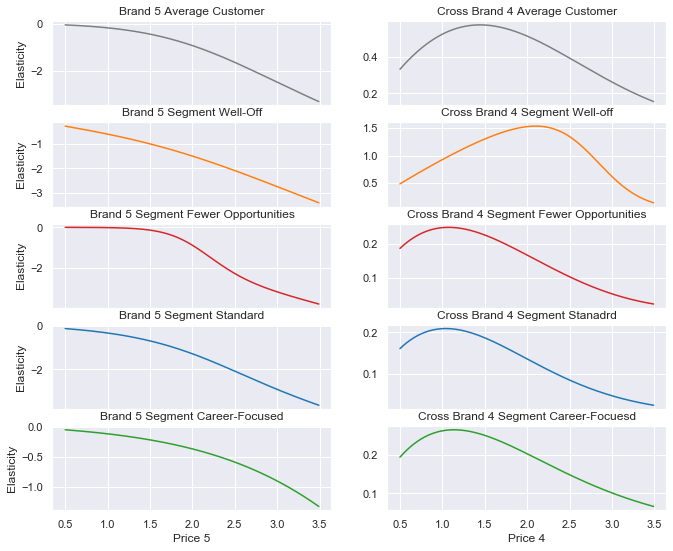

In [192]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0, 'tab:orange')
ax2[0].set_title('Brand 5 Segment Well-Off')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, 'tab:orange')
ax2[1].set_title('Cross Brand 4 Segment Well-off')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:red')
ax3[0].set_title('Brand 5 Segment Fewer Opportunities')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:red')
ax3[1].set_title('Cross Brand 4 Segment Fewer Opportunities')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:blue')
ax4[0].set_title('Brand 5 Segment Standard')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:blue')
ax4[1].set_title('Cross Brand 4 Segment Stanadrd')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:green')
ax5[0].set_title('Brand 5 Segment Career-Focused')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:green')
ax5[1].set_title('Cross Brand 4 Segment Career-Focuesd')
ax5[1].set_xlabel('Price 4')

## Price Elasticity of Purchase Quantity

In [205]:
df_purchase_quantity = df_pa[df_pa['Incidence']==1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,0,0,0,0,47,1,110866,1,0,1
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,0,1,0,0,47,1,110866,1,0,1
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,1,0,0,0,47,1,110866,1,0,1
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,0,0,0,0,47,1,110866,1,0,1
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,1,1,0,0,47,1,110866,1,0,1


In [206]:
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Education,Income,Occupation,Settlement size,Segment,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.151045,126706.452043,0.845471,0.797513,1.543244,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,0.634625,39935.109358,0.633840,0.810358,1.144602,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,38247.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,1.000000,102723.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,122895.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,147967.000000,1.000000,1.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,309364.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'],
      dtype=object)

In [208]:
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [209]:
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation Linear Regression

In [210]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [211]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [214]:
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
model_quantity.coef_

array([-0.8173651 , -0.10504673])

## Price Elasticity Estimation

In [216]:
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [217]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016685002

In [218]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [219]:
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [220]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011,-0.297332,0.482421,-0.001034,0.187010,-0.116286,0.160463,-0.043940,0.194770,-0.102157
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288,-0.303378,0.491726,-0.001096,0.189373,-0.119334,0.162413,-0.045027,0.197254,-0.104413
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507,-0.309435,0.501016,-0.001160,0.191685,-0.122417,0.164317,-0.046123,0.199687,-0.106679
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669,-0.315502,0.510290,-0.001229,0.193947,-0.125536,0.166177,-0.047229,0.202069,-0.108954
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773,-0.321580,0.519548,-0.001300,0.196158,-0.128690,0.167992,-0.048343,0.204401,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014747,-12.531934,-5.110859,-5.898622,-4.291376,-4.863304,-4.984816,-3.231574,0.162232,-3.337314,0.157493,-3.746031,0.022975,-3.592239,0.024307,-1.287424,0.068593,-1.774292
296,3.46,-8.040001,-12.568824,-5.127881,-5.915986,-4.304009,-4.881508,-5.001725,-3.247768,0.160332,-3.350645,0.152071,-3.757475,0.022523,-3.606120,0.023946,-1.297233,0.067970,-1.788634
297,3.47,-8.065219,-12.605698,-5.144883,-5.933342,-4.316636,-4.899682,-5.018615,-3.263930,0.158446,-3.363972,0.146815,-3.768899,0.022077,-3.619958,0.023589,-1.307097,0.067351,-1.803124
298,3.48,-8.090405,-12.642555,-5.161867,-5.950690,-4.329257,-4.917826,-5.035484,-3.280059,0.156575,-3.377296,0.141719,-3.780303,0.021638,-3.633752,0.023237,-1.317017,0.066737,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

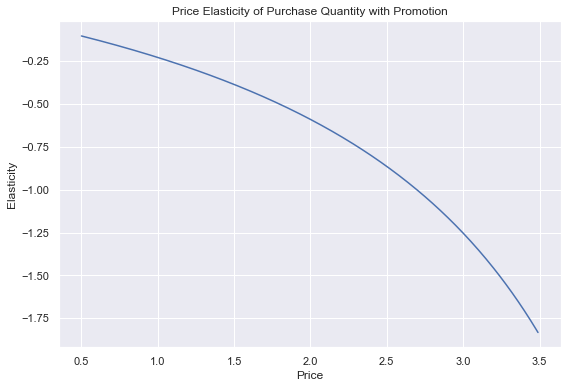

In [221]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

In [222]:
df_price_elasticity_quantity['Promotion_Incidence'] = 0
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segement_1,PE_Segement_2,PE_Segement_3,PE_Segement_0,Elasticity_Promotion,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096403,-0.031004,-0.209990,-0.014593,-0.010617,-0.125766,-0.195696,-0.049056,0.332011,-0.297332,0.482421,-0.001034,0.187010,-0.116286,0.160463,-0.043940,0.194770,-0.102157,-0.099543
1,0.51,-0.100472,-0.032775,-0.216565,-0.015427,-0.011223,-0.129884,-0.201820,-0.050617,0.337288,-0.303378,0.491726,-0.001096,0.189373,-0.119334,0.162413,-0.045027,0.197254,-0.104413,-0.101736
2,0.52,-0.104668,-0.034633,-0.223248,-0.016301,-0.011859,-0.134081,-0.208046,-0.052207,0.342507,-0.309435,0.501016,-0.001160,0.191685,-0.122417,0.164317,-0.046123,0.199687,-0.106679,-0.103939
3,0.53,-0.108994,-0.036581,-0.230042,-0.017218,-0.012527,-0.138357,-0.214375,-0.053827,0.347669,-0.315502,0.510290,-0.001229,0.193947,-0.125536,0.166177,-0.047229,0.202069,-0.108954,-0.106150
4,0.54,-0.113453,-0.038625,-0.236948,-0.018180,-0.013227,-0.142715,-0.220809,-0.055478,0.352773,-0.321580,0.519548,-0.001300,0.196158,-0.128690,0.167992,-0.048343,0.204401,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.014747,-12.531934,-5.110859,-5.898622,-4.291376,-4.863304,-4.984816,-3.231574,0.162232,-3.337314,0.157493,-3.746031,0.022975,-3.592239,0.024307,-1.287424,0.068593,-1.774292,-1.664290
296,3.46,-8.040001,-12.568824,-5.127881,-5.915986,-4.304009,-4.881508,-5.001725,-3.247768,0.160332,-3.350645,0.152071,-3.757475,0.022523,-3.606120,0.023946,-1.297233,0.067970,-1.788634,-1.677205
297,3.47,-8.065219,-12.605698,-5.144883,-5.933342,-4.316636,-4.899682,-5.018615,-3.263930,0.158446,-3.363972,0.146815,-3.768899,0.022077,-3.619958,0.023589,-1.307097,0.067351,-1.803124,-1.690246
298,3.48,-8.090405,-12.642555,-5.161867,-5.950690,-4.329257,-4.917826,-5.035484,-3.280059,0.156575,-3.377296,0.141719,-3.780303,0.021638,-3.633752,0.023237,-1.317017,0.066737,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

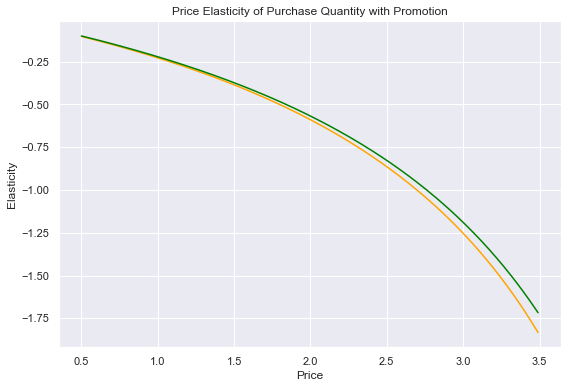

In [224]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no, color = 'green')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')